# ⬇️ Imaport Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read 📖 Datasets 🗃️ & Analysis 🔍 of JD.com

### Reading JD_order_data.csv 📁 table from dataset

In [2]:
df_order =  pd.read_csv('data\JD_order_data.csv')

#### *Simple 🕵️🕵️‍♀️ Quality & Descriptive Analysis on the table*

In [3]:
df_order.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


In [4]:
df_order.dtypes

order_ID                       object
user_ID                        object
sku_ID                         object
order_date                     object
order_time                     object
quantity                        int64
type                            int64
promise                        object
original_unit_price           float64
final_unit_price              float64
direct_discount_per_unit      float64
quantity_discount_per_unit    float64
bundle_discount_per_unit      float64
coupon_discount_per_unit      float64
gift_item                       int64
dc_ori                          int64
dc_des                          int64
dtype: object

In [5]:
df_order.describe()

,quantity,type,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
count,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000
mean,1.216670,1.499139,102.813542,71.572599,19.845889,7.843390,0.625649,2.926015,0.172014,12.062714,21.679845
std,1.844589,0.500000,95.035563,75.879057,33.593536,17.994354,6.442281,11.588338,0.377393,14.201200,16.973899
min,1.000000,1.000000,0.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,59.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,79.000000,58.000000,4.000000,0.000000,0.000000,0.000000,0.000000,7.000000,20.000000
75%,1.000000,2.000000,139.000000,95.000000,21.000000,0.000000,0.000000,0.000000,0.000000,10.000000,34.000000
max,400.000000,2.000000,12158.000000,12158.000000,720.000000,225.000000,252.000000,210.000000,1.000000,67.000000,67.000000


In [6]:
df_order.duplicated().sum()

3928

In [7]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549989 entries, 0 to 549988
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    549989 non-null  object 
 1   user_ID                     549989 non-null  object 
 2   sku_ID                      549989 non-null  object 
 3   order_date                  549989 non-null  object 
 4   order_time                  549989 non-null  object 
 5   quantity                    549989 non-null  int64  
 6   type                        549989 non-null  int64  
 7   promise                     549989 non-null  object 
 8   original_unit_price         549989 non-null  float64
 9   final_unit_price            549989 non-null  float64
 10  direct_discount_per_unit    549989 non-null  float64
 11  quantity_discount_per_unit  549989 non-null  float64
 12  bundle_discount_per_unit    549989 non-null  float64
 13  coupon_discoun

##### 🔍 Find Inconsistency

In [8]:
df_obj_sku = df_order.select_dtypes(include="object")

In [9]:
df_obj_sku.isin(['-']).sum()

order_ID           0
user_ID            0
sku_ID             0
order_date         0
order_time         0
promise       208583
dtype: int64

##### Fixing the inconsistency present in the data 🪛

In [10]:
df_order.replace('-',np.nan,inplace=True)

### Reading JD_sku_data.csv 📁 table from dataset

In [11]:
df_sku =  pd.read_csv('data\JD_sku_data.csv')

#### *Simple 🕵️🕵️‍♀️ Quality & Descriptive Analysis on the table*

In [12]:
df_sku.head()

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3.0,60.0,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2.0,50.0,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3.0,70.0,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3.0,70.0,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN


In [13]:
df_obj_sku = df_sku.select_dtypes(include="object")

In [14]:
df_obj_sku.isin(['-']).sum()

sku_ID                 0
brand_ID               0
attribute1         15961
attribute2         17319
activate_date          0
deactivate_date        0
dtype: int64

In [15]:
df_sku.replace('-',np.nan,inplace=True)

In [16]:
df_sku.describe()

,type
count,31868.000000
mean,1.963380
std,0.187829
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [17]:
df_sku.duplicated().sum()

0

In [18]:
df_sku.dtypes

sku_ID             object
type                int64
brand_ID           object
attribute1         object
attribute2         object
activate_date      object
deactivate_date    object
dtype: object

In [19]:
df_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31868 entries, 0 to 31867
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_ID           31868 non-null  object
 1   type             31868 non-null  int64 
 2   brand_ID         31868 non-null  object
 3   attribute1       15907 non-null  object
 4   attribute2       14549 non-null  object
 5   activate_date    3058 non-null   object
 6   deactivate_date  1141 non-null   object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


### Reading JD_user_data.csv 📁 table from dataset

In [20]:
df_user =  pd.read_csv('data/JD_user_data.csv')

#### *Simple 🕵️🕵️‍♀️ Quality & Descriptive Analysis on the table*

In [21]:
df_user.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [22]:
df_user.dtypes

user_ID              object
user_level            int64
first_order_month    object
plus                  int64
gender               object
age                  object
marital_status       object
education             int64
city_level            int64
purchase_power        int64
dtype: object

In [23]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [24]:
df_user['first_order_month'].sample(20)

270946    2016-08
286186    2010-11
22057     2017-10
221806    2016-04
231003    2013-08
186274    2017-06
377916    2017-08
217625    2011-05
365214    2016-11
226965    2013-09
378540    2015-10
426358    2014-03
13058     2013-09
175263    2017-10
264990    2015-12
446918    2015-05
270875    2017-10
165801    2015-06
398314    2018-03
135169    2015-12
Name: first_order_month, dtype: object

# Data Cleaing/Processing 🧹/🔁

### Data Cleaning/Processig JD_order_data.csv

In [25]:
df_order.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,NaN,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


#### Handling Missing Values ⛔

In [26]:
df_order.isna().sum()

order_ID                           0
user_ID                            0
sku_ID                             0
order_date                         0
order_time                         0
quantity                           0
type                               0
promise                       208583
original_unit_price                0
final_unit_price                   0
direct_discount_per_unit           0
quantity_discount_per_unit         0
bundle_discount_per_unit           0
coupon_discount_per_unit           0
gift_item                          0
dc_ori                             0
dc_des                             0
dtype: int64

The col Promise is the expected delivery date the a packge that has to be delivered expected delivery time of the company is 2 or less so null entries are consider to be more than 2 so be 3 in common

In [27]:
df_order['promise'].fillna('3',inplace=True)
df_order['promise'] = df_order['promise'].astype(int)

#### Reordering order data into order_date order_time and order_day 🗓️

In [28]:
df_order['order_date'] = pd.to_datetime(df_order['order_date'])
df_order['order_time'] = pd.to_datetime(df_order['order_time'])

In [29]:
df_order['order_day'] = df_order['order_date'].dt.day_of_week
df_order['order_date'] = df_order['order_time'].dt.date
df_order['order_time'] = df_order['order_time'].dt.time

In [30]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549989 entries, 0 to 549988
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    549989 non-null  object 
 1   user_ID                     549989 non-null  object 
 2   sku_ID                      549989 non-null  object 
 3   order_date                  549989 non-null  object 
 4   order_time                  549989 non-null  object 
 5   quantity                    549989 non-null  int64  
 6   type                        549989 non-null  int64  
 7   promise                     549989 non-null  int32  
 8   original_unit_price         549989 non-null  float64
 9   final_unit_price            549989 non-null  float64
 10  direct_discount_per_unit    549989 non-null  float64
 11  quantity_discount_per_unit  549989 non-null  float64
 12  bundle_discount_per_unit    549989 non-null  float64
 13  coupon_discoun

In [31]:
df_order.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,order_day
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,17:14:25,1,2,3,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28,3
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,11:10:40,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28,3
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,09:13:26,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28,3
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,21:29:50,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28,3
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,19:13:37,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16,3


### Data Cleaning/Processig JD_sku_data.csv

In [32]:
df_sku.head()

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3.0,60.0,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2.0,50.0,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3.0,70.0,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3.0,70.0,NaN,NaN
4,2fa77e3b4d,2,b681299668,NaN,NaN,NaN,NaN


In [33]:
df_sku['attribute1'].fillna('0.0',inplace = True)
df_sku['attribute2'].fillna('0.0',inplace = True)
df_sku['attribute1'] = df_sku['attribute1'].astype(float)
df_sku['attribute2'] = df_sku['attribute2'].astype(float)

In [34]:
df_sku['activate_date'].unique()

array([nan, '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
       '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
       '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
       '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
       '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
       '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
       '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
       '2018-03-29', '2018-03-30', '2018-03-31'], dtype=object)

In [35]:
df_sku['deactivate_date'].unique()

array([nan, '2018-03-23', '2018-03-05', '2018-03-10', '2018-03-12',
       '2018-03-30', '2018-03-09', '2018-03-22', '2018-03-21',
       '2018-03-08', '2018-03-02', '2018-03-06', '2018-03-26',
       '2018-03-14', '2018-03-19', '2018-03-16', '2018-03-28',
       '2018-03-27', '2018-03-11', '2018-03-15', '2018-03-13',
       '2018-03-18', '2018-03-20', '2018-03-24', '2018-03-07',
       '2018-03-29', '2018-03-03', '2018-03-01', '2018-03-17',
       '2018-03-31', '2018-03-25', '2018-03-04'], dtype=object)

In [36]:
df_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31868 entries, 0 to 31867
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku_ID           31868 non-null  object 
 1   type             31868 non-null  int64  
 2   brand_ID         31868 non-null  object 
 3   attribute1       31868 non-null  float64
 4   attribute2       31868 non-null  float64
 5   activate_date    3058 non-null   object 
 6   deactivate_date  1141 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ MB


### Data Cleaning/Processig JD_user_data.csv

In [37]:
df_user.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [38]:
(df_user['gender'].isin(['U']).sum()/df_user.shape[0])*100

12.53384007802352

In [39]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


# Data 📊📈📉💹 Visualization

### Data Viz JD_user_data.csv 👨

The Below graph tells that JD.com has very less fresh users it tells about there loyal customer base

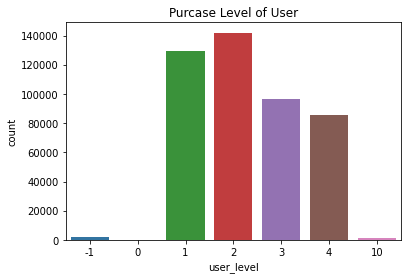

In [50]:
sns.countplot(x = 'user_level' , data =df_user)
plt.title('Purcase Level of User')
plt.show()

In [51]:
df_user

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
457293,ffff38690b,1,2018-03,0,U,U,U,-1,-1,-1
457294,ffffa1a495,4,2011-09,1,M,26-35,S,3,1,2
457295,ffffb20ef7,3,2017-11,0,M,36-45,M,2,4,2
457296,ffffc45330,1,2016-04,0,F,26-35,M,-1,-1,-1


# Rough Work

## 🚮 Rough Work on JD_order_data.csv Table

In [40]:
df_order.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,order_day
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,17:14:25,1,2,3,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28,3
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,11:10:40,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28,3
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,09:13:26,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28,3
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,21:29:50,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28,3
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,19:13:37,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16,3


### Finding Missing Values 🕵️

In [41]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549989 entries, 0 to 549988
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    549989 non-null  object 
 1   user_ID                     549989 non-null  object 
 2   sku_ID                      549989 non-null  object 
 3   order_date                  549989 non-null  object 
 4   order_time                  549989 non-null  object 
 5   quantity                    549989 non-null  int64  
 6   type                        549989 non-null  int64  
 7   promise                     549989 non-null  int32  
 8   original_unit_price         549989 non-null  float64
 9   final_unit_price            549989 non-null  float64
 10  direct_discount_per_unit    549989 non-null  float64
 11  quantity_discount_per_unit  549989 non-null  float64
 12  bundle_discount_per_unit    549989 non-null  float64
 13  coupon_discoun

##### Analysing Object Colums for Miss placed Values 📖🔍

In [42]:
df_obj_order = df_order.select_dtypes(include='object')
df_obj_order.sample(10)

,order_ID,user_ID,sku_ID,order_date,order_time
165602,2bfe1aea10,dbf74735e9,dd1fed906f,2018-03-08,06:16:29
376705,fa7597dccb,c847fa79a2,dbd945bd02,2018-03-23,23:03:05
505138,15e7c0d5f3,99100dd107,8262d02902,2018-03-29,10:03:42
162282,203beb1045,fad13c2abe,50b53a8536,2018-03-08,22:12:07
99042,8f2fd9ea55,8d7acf61d9,5f58bfd286,2018-03-05,23:11:50
477895,63dc0ea1c4,0fc69f0113,8c8d9385cc,2018-03-28,11:54:59
297477,c80a35864c,7b8e5f7633,d47c6ca631,2018-03-17,21:36:20
107011,4ea9d052bc,22e1739ec9,904fbf8b97,2018-03-05,15:08:49
288782,bef81ed148,0fbb2b9c82,30c282b0d4,2018-03-16,23:19:17
466351,cc3b77ac39,db46d9514f,7f53769d3f,2018-03-28,22:18:33


In [44]:
df_obj_order[df_obj_order['promise'].isin(['-'])]

KeyError: 'promise'

In [ ]:
df_order.replace('-',np.nan,inplace=True)

In [ ]:
df_order.sample(10)

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
379296,a9e1a44af4,d2825793ae,f843fb960c,2018-03-23,2018-03-23 20:30:51.0,1,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,5,17
361421,99bdb4df93,cfc755e6ed,2523d051fd,2018-03-22,2018-03-22 09:47:43.0,1,1,1,298.0,238.0,60.0,0.0,0.0,0.0,0,9,9
494564,7b4bba8eae,500b7c194d,68c347f03a,2018-03-29,2018-03-29 06:48:12.0,1,2,1,79.0,39.0,0.0,0.0,0.0,40.0,0,5,5
501124,cf11e65e50,97c1932c57,1a92513d9e,2018-03-29,2018-03-29 10:46:39.0,1,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,5,5
303544,8909ffaf9e,7dc9529d00,2e69af1fdf,2018-03-17,2018-03-17 20:18:58.0,1,1,2,170.0,94.0,0.0,76.0,0.0,0.0,0,10,37
62063,f5e7b350e7,aa47505c22,623d0a582a,2018-03-03,2018-03-03 14:34:08.0,1,1,2,78.0,59.0,19.0,0.0,0.0,0.0,0,10,47
49600,c55e3e5622,d1916b210a,dacf9ea2b9,2018-03-02,2018-03-02 13:11:12.0,1,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4
439262,c41182de02,74b01493ed,01c99f44fd,2018-03-26,2018-03-26 06:27:25.0,2,2,NaN,79.0,35.1,40.0,3.9,0.0,0.0,0,10,10
370058,c20de9d644,555f366827,30c282b0d4,2018-03-22,2018-03-22 19:21:13.0,1,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2
111542,dde0724269,d319dc2ff8,0c8653db6f,2018-03-06,2018-03-06 14:19:06.0,1,2,NaN,69.0,29.0,20.0,15.0,0.0,5.0,0,5,5


## 🚮 Rough Work on JD_sku_data.csv Table

In [ ]:
df_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31868 entries, 0 to 31867
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_ID           31868 non-null  object
 1   type             31868 non-null  int64 
 2   brand_ID         31868 non-null  object
 3   attribute1       31868 non-null  object
 4   attribute2       31868 non-null  object
 5   activate_date    3058 non-null   object
 6   deactivate_date  1141 non-null   object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [ ]:
df_obj_sku = df_sku.select_dtypes(include="object")

In [ ]:
df_obj_sku.isin(['-']).sum()

sku_ID             0
brand_ID           0
attribute1         0
attribute2         0
activate_date      0
deactivate_date    0
dtype: int64

In [ ]:
df_sku.replace('-',np.nan,inplace=True)

## 🚮 Rough Work on JD_user_data.csv Table

In [ ]:
df_user

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
457293,ffff38690b,1,2018-03,0,U,U,U,-1,-1,-1
457294,ffffa1a495,4,2011-09,1,M,26-35,S,3,1,2
457295,ffffb20ef7,3,2017-11,0,M,36-45,M,2,4,2
457296,ffffc45330,1,2016-04,0,F,26-35,M,-1,-1,-1
